## Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.

### Columns                                            
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

### Predict : Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
categor_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categor_col.append(i)        
    else:
        numerical_col.append(i)
print('Categorical column = ', categor_col)
print('Numerical column = ', numerical_col)

Categorical column =  ['sex', 'smoker', 'region']
Numerical column =  ['age', 'bmi', 'children', 'charges']


## Using Encoder on categorical columns

In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df   


,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [9]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Observations
- No null values found
- Have observe mean, std, 50% and max
- Having major difference between 75% and max for features (age, bmi), may be due to outliers.

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


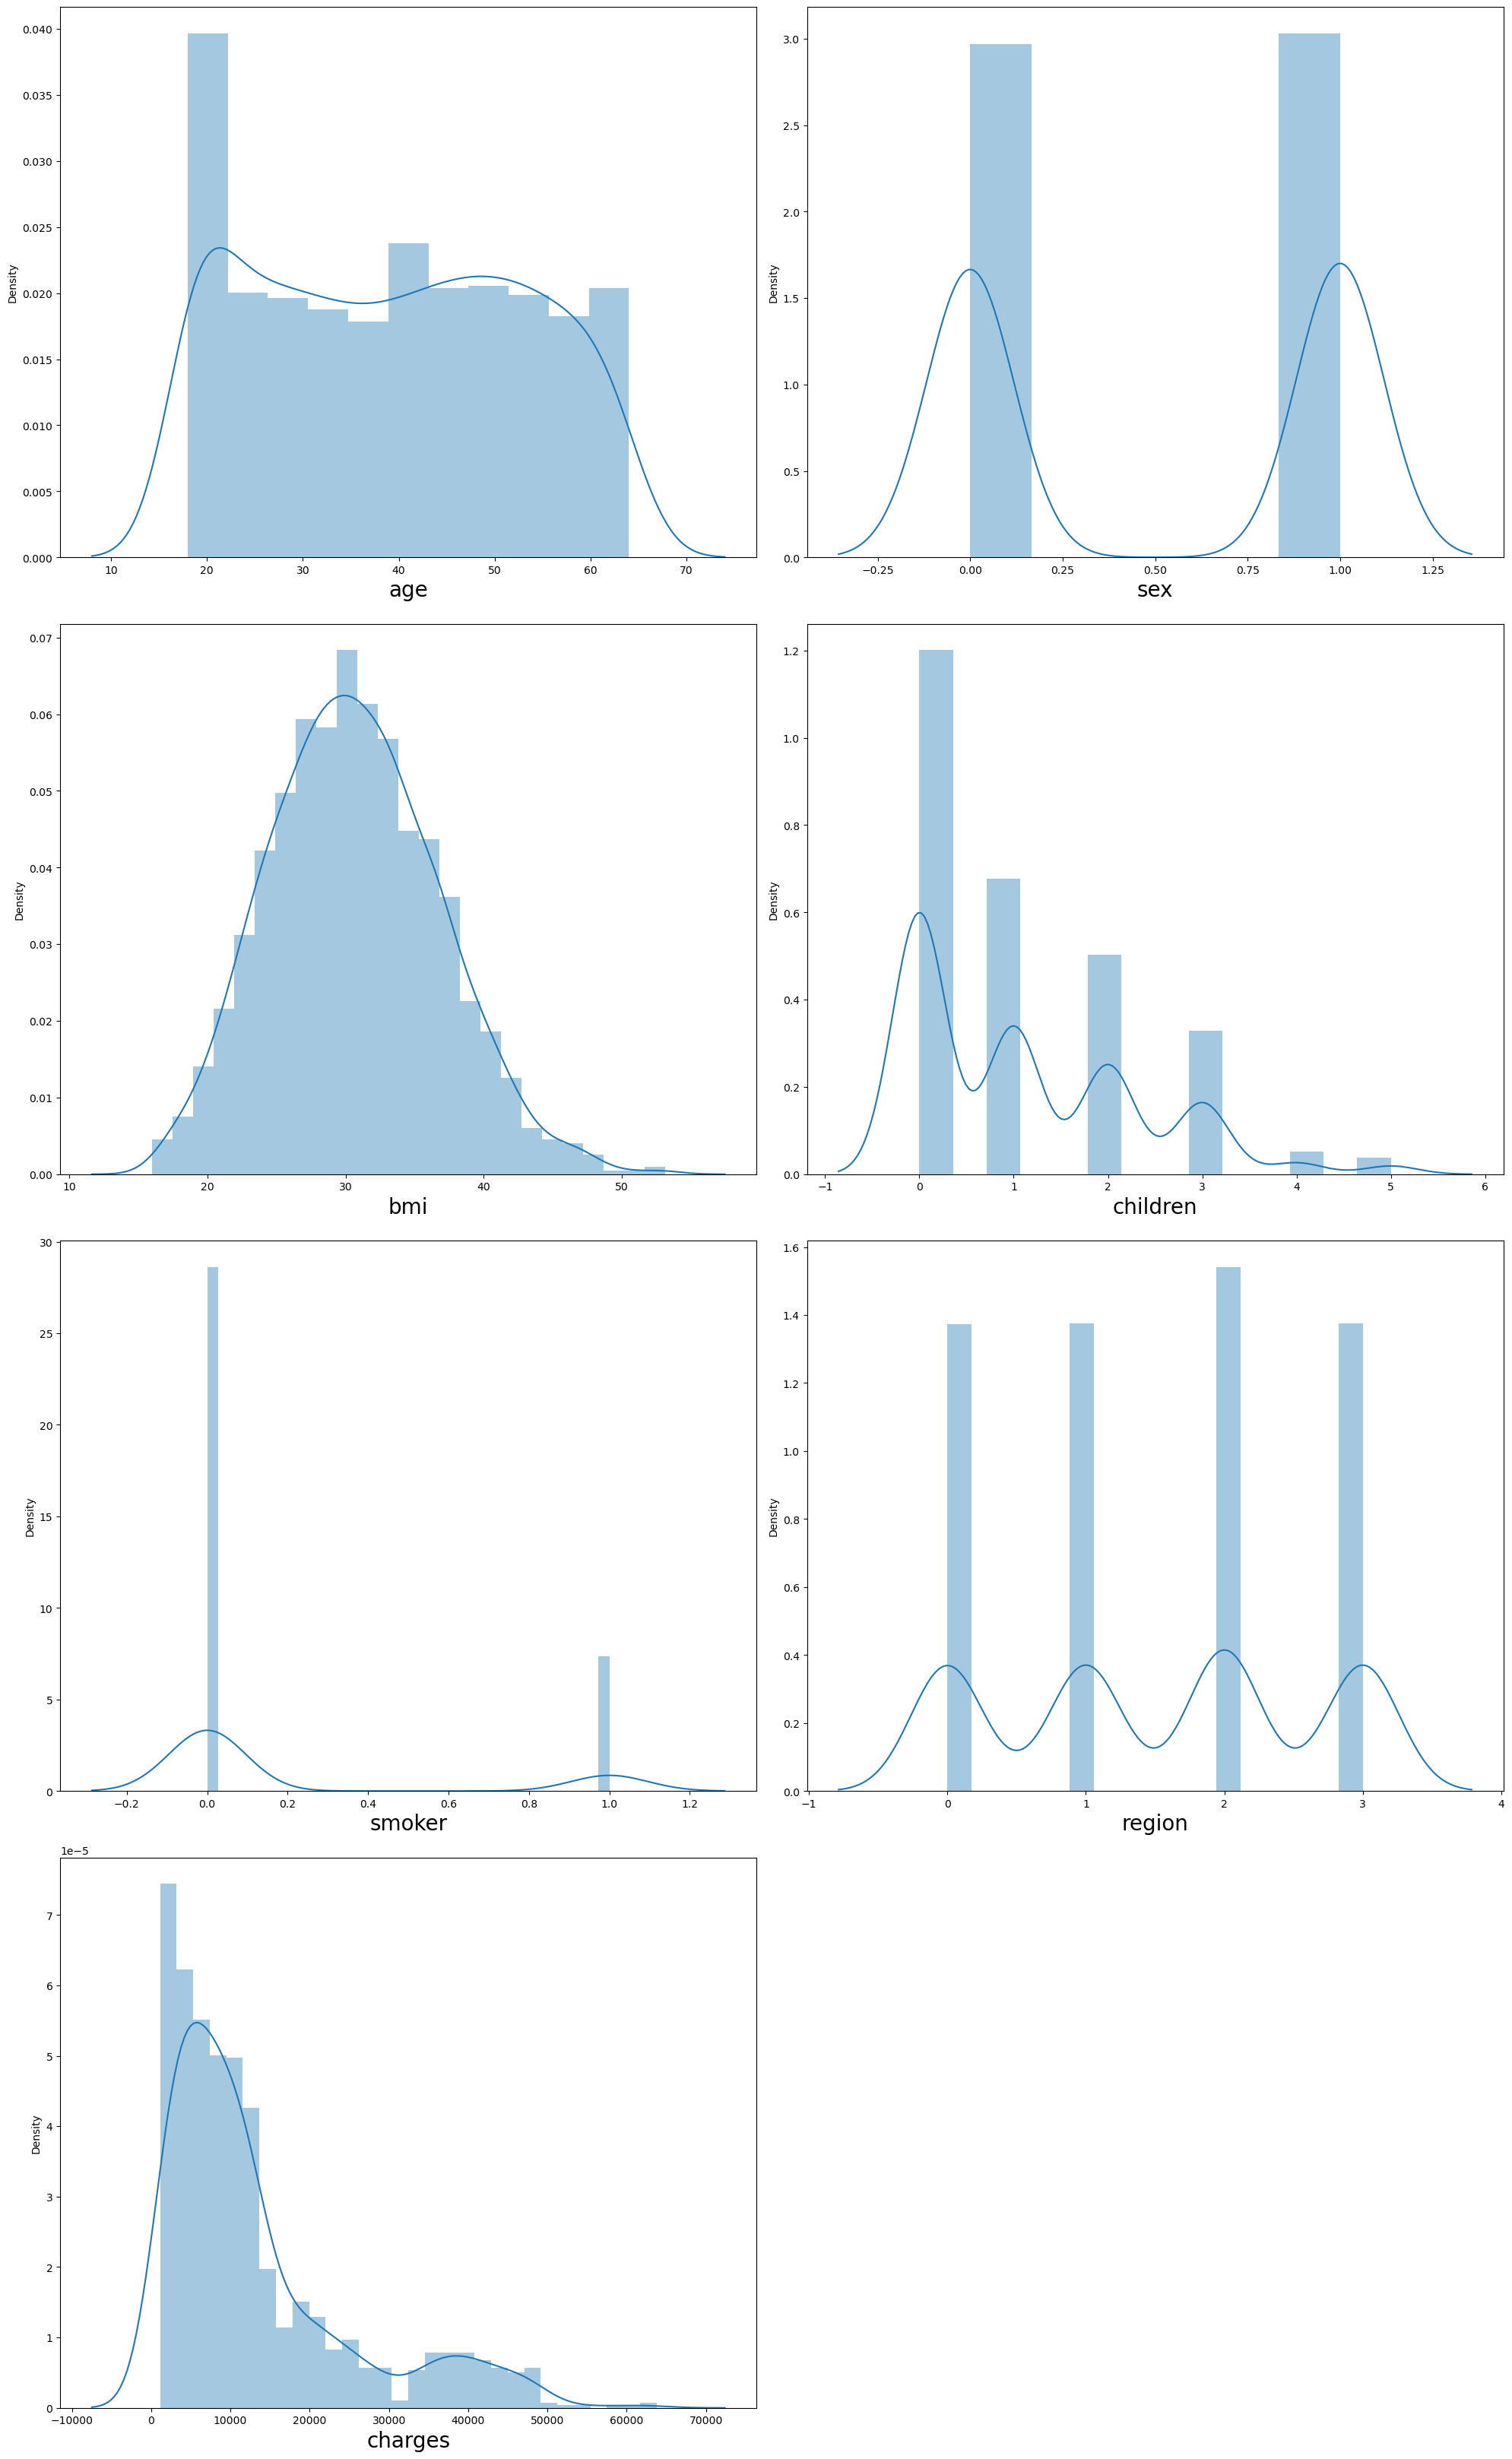

In [12]:
## Check Relationship between columns
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in df.columns:
    if plotnumber <=7:
        plt.subplot(5, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1 
plt.tight_layout()  

### Observations
- Slight Right skewdness can be seen in colummns (bmi, children, charges). However, children is categorical data and charges is label

In [13]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

### Observations:
No skewness have ben observed in numerical columns, except categorical columns (children, smoker) and label(charges)

In [14]:
### Seperates features and label to check relationship
x = df.drop('charges', axis =1)
y = df.charges

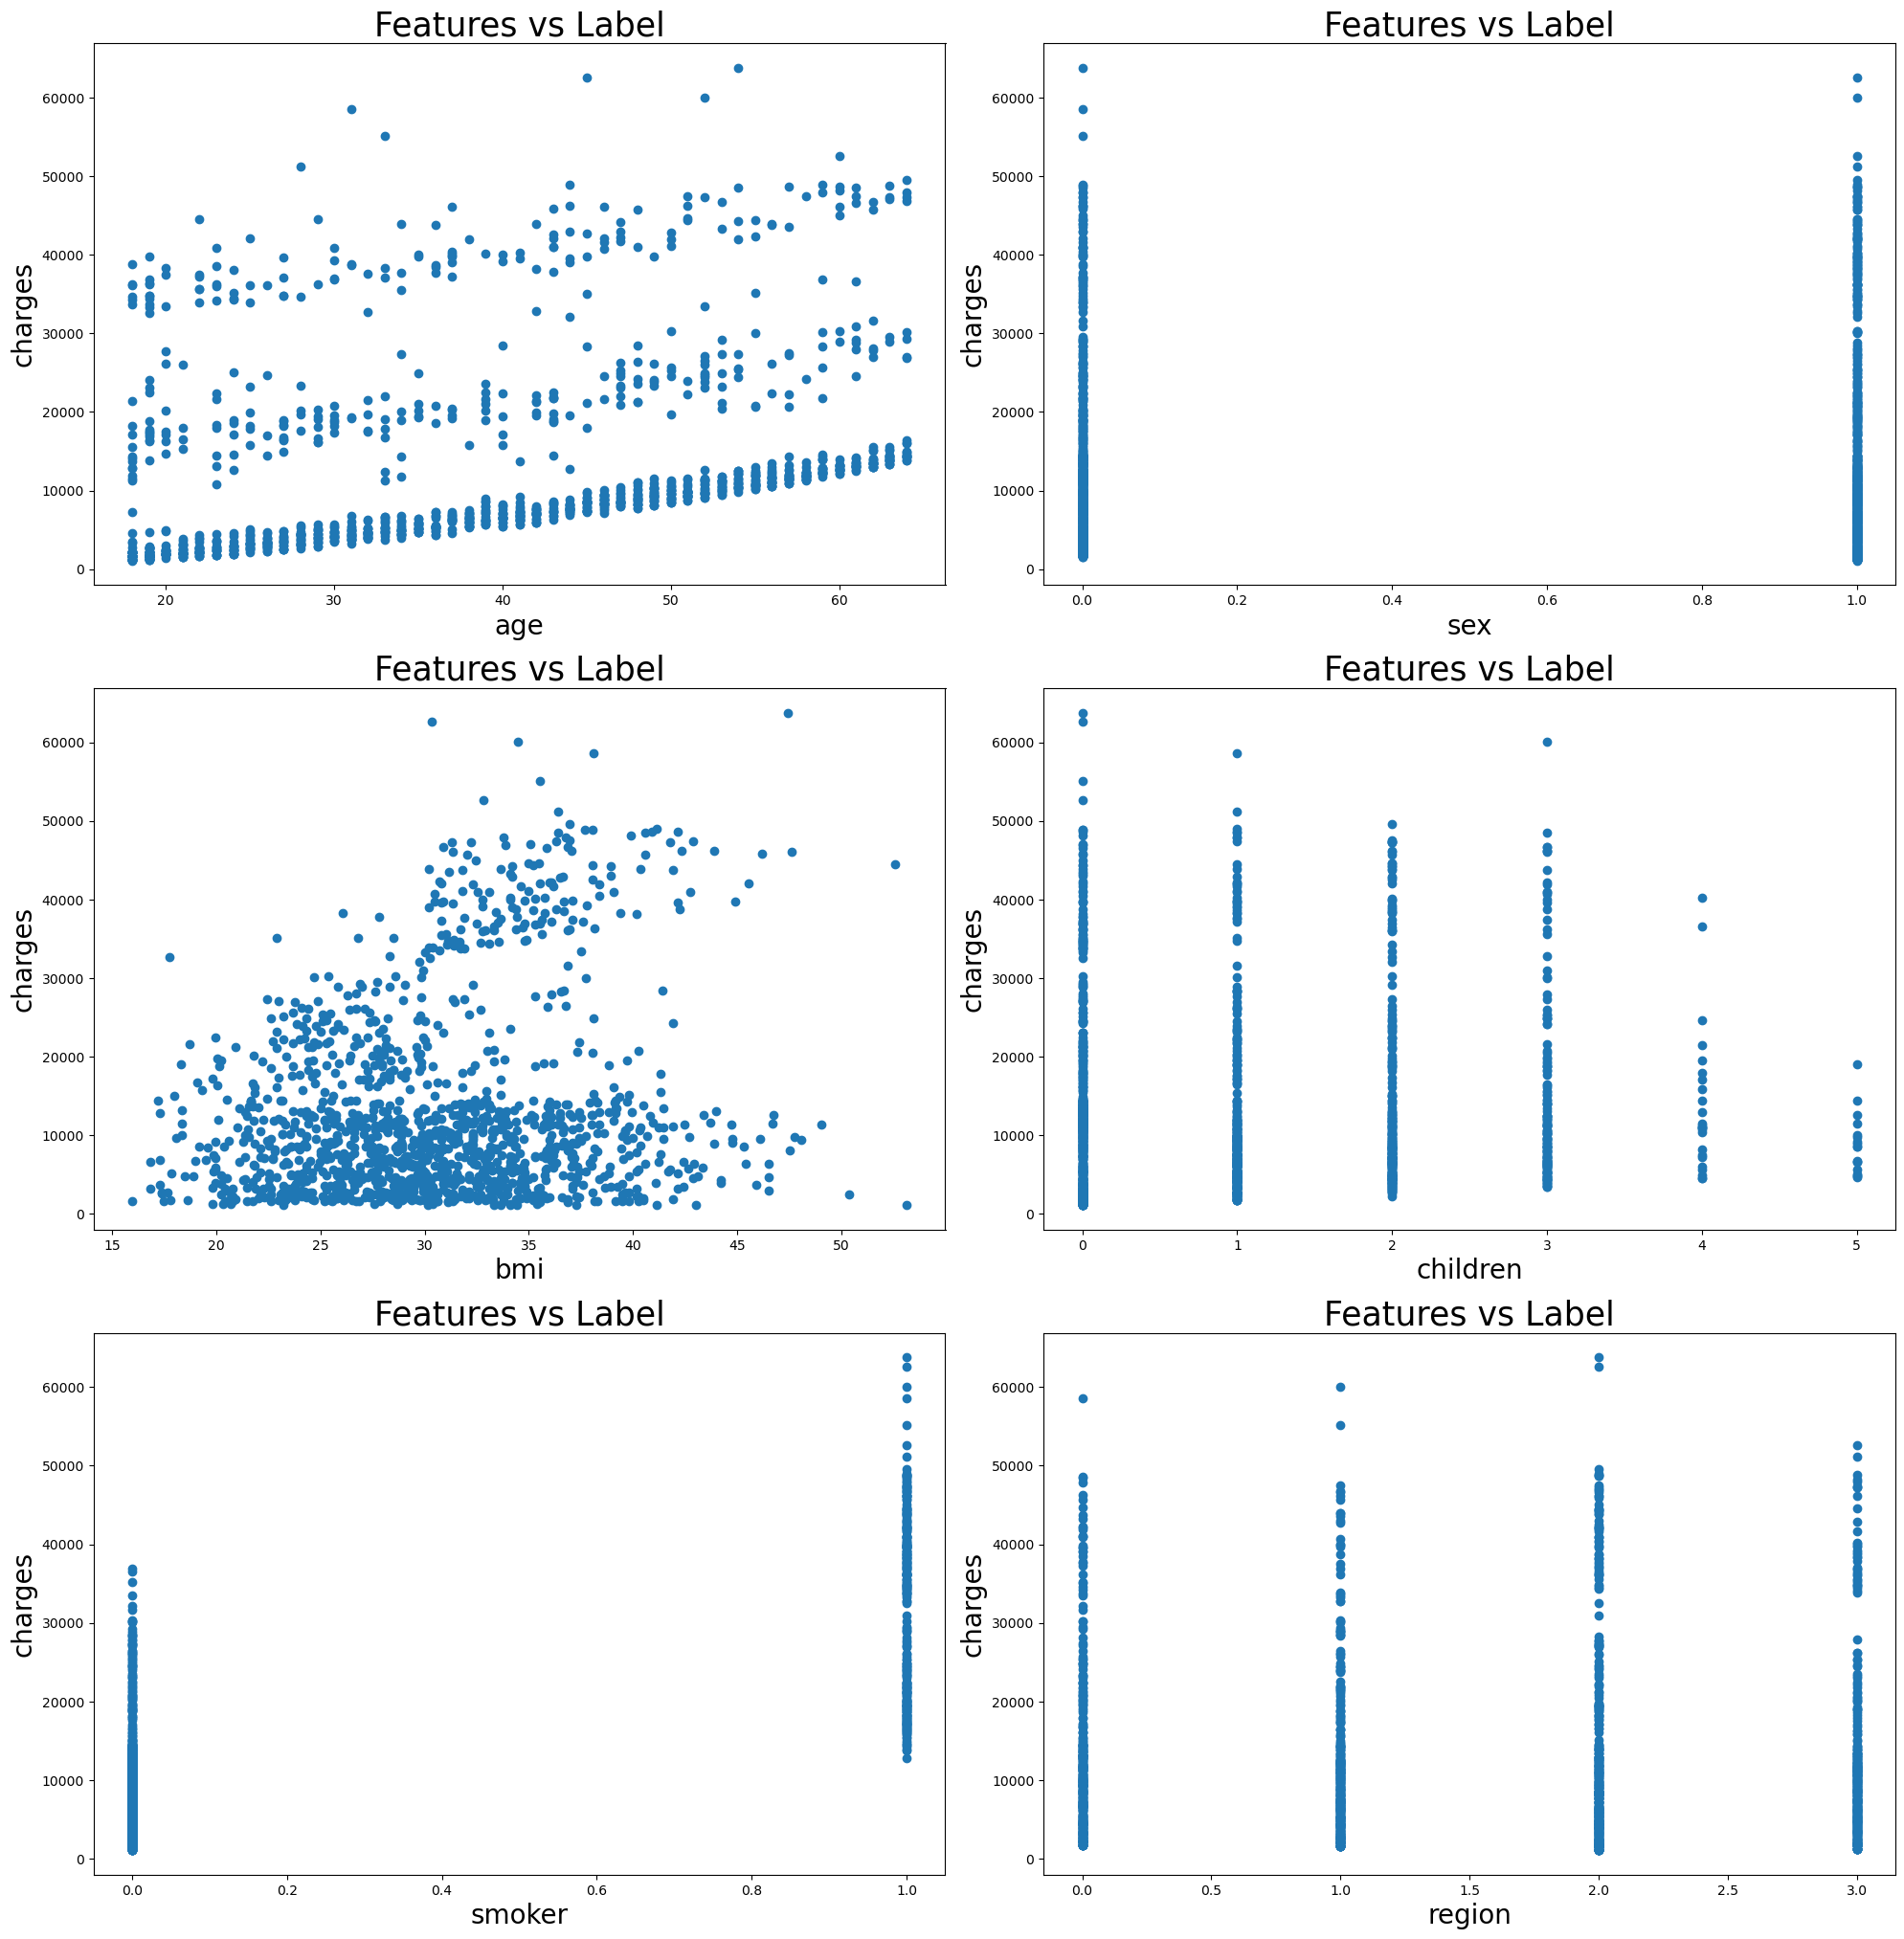

In [15]:
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in x.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        plt.scatter(x[i], y)
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('charges', fontsize = 20)
        plt.title('Features vs Label', fontsize = 25)
    plotnumber+=1 
plt.tight_layout()  

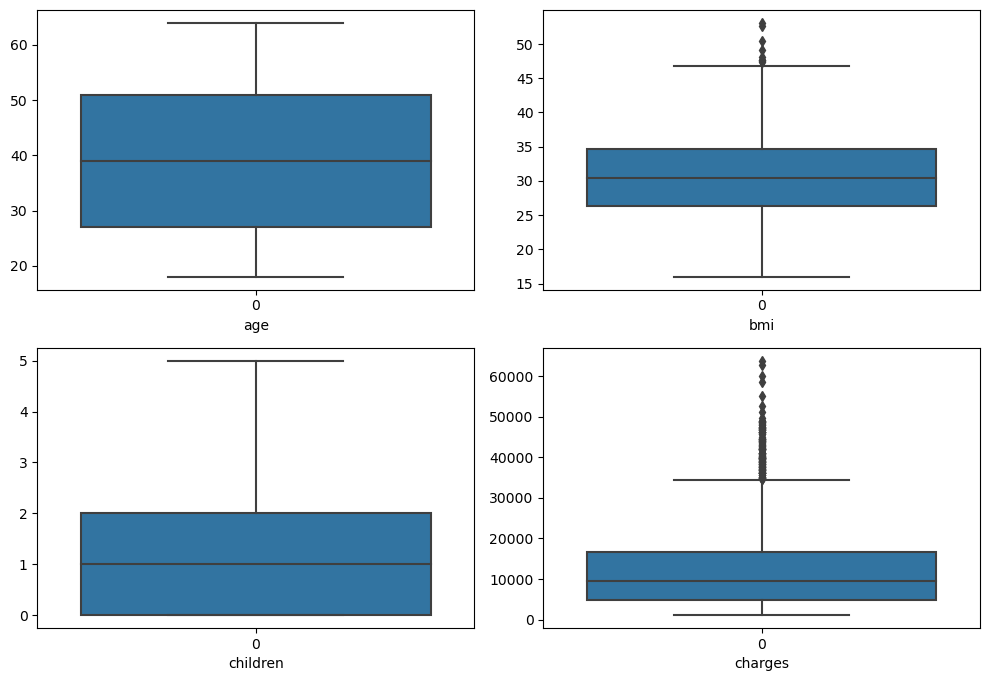

In [16]:
## Checking Outliers
plt.figure(figsize = (10, 20))
number = 1
for col in numerical_col:
    if number <= 4:
        plt.subplot(6, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)
    number+=1
plt.tight_layout()  

### Observations:
- Only 1 numerical column (BMI) having outliers. 
- Label having outliers- 

In [17]:
## removing outliers with IQR
q1 = np.percentile(df['bmi'], 25)
q3 = np.percentile(df['bmi'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
high_bound = q3 + (1.5 * iqr)
outliers = (df['bmi'] < lower_bound) | (df['bmi'] > high_bound)
df1 = df[~outliers]
old_data = df.shape[0]
new_data = df1.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 1338
New data =  1329
Loss data in percentage =  0.672645739910314


In [18]:
## removing outliers with z score
from scipy.stats import zscore
z = np.abs(zscore(df['bmi']))
np.where(z>3)
df2 = df[(z<3)]
old_data = df.shape[0]
new_data = df2.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 1338
New data =  1334
Loss data in percentage =  0.29895366218236175


### Observations
- Both outlier's score were in acceptable, however will go further with Z score due to having less data loss compare to IQR

In [19]:
df = df2
df.shape

(1334, 7)

### Check Multicollinearity betweeen all columns

In [20]:
cor = df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.042345,-0.023820,0.002974,0.301360
sex,-0.019041,1.000000,0.037031,0.018667,0.076096,0.003293,0.057165
bmi,0.118887,0.037031,1.000000,0.018054,0.002264,0.155877,0.200799
children,0.042345,0.018667,0.018054,1.000000,0.007087,0.017234,0.067569
smoker,-0.023820,0.076096,0.002264,0.007087,1.000000,-0.002333,0.786536
region,0.002974,0.003293,0.155877,0.017234,-0.002333,1.000000,-0.006404
charges,0.301360,0.057165,0.200799,0.067569,0.786536,-0.006404,1.000000


<AxesSubplot:>

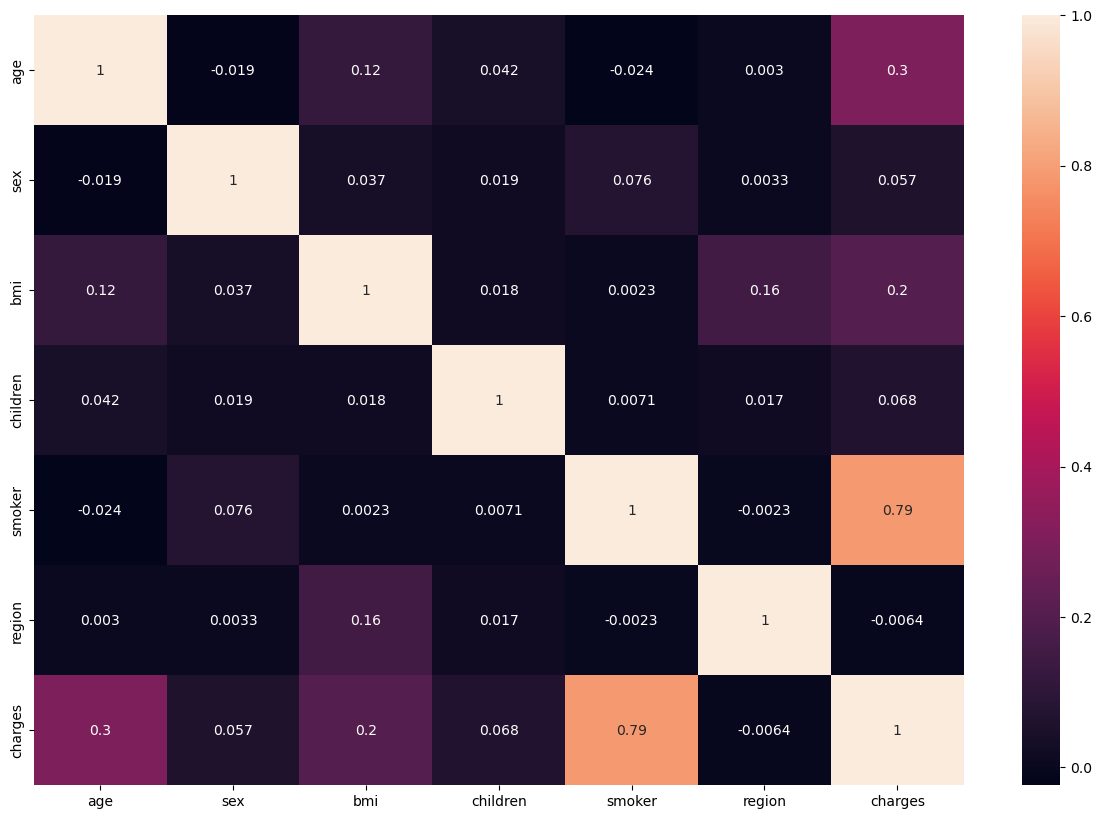

In [21]:
plt.figure(figsize = (15, 10))
sns.heatmap(cor, annot=True)

### Observations:
- No multicollinearity between features
- Having postive correlation between following features (age, bmi, smoker) and label, however not that strong.

In [22]:
x = df.drop('charges', axis=1)
y = df.charges

### Features Scaling and using Standard Scalrization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,age,sex,bmi,children,smoker,region
0,-1.442249,-1.007525,-0.450359,-0.909299,1.971407,1.343594
1,-1.513528,0.992532,0.528191,-0.080177,-0.507252,0.439278
2,-0.800739,0.992532,0.399829,1.578066,-0.507252,0.439278
3,-0.444344,0.992532,-1.316383,-0.909299,-0.507252,-0.465038
4,-0.515623,0.992532,-0.286989,-0.909299,-0.507252,-0.465038
...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.578066,-0.507252,-0.465038
1330,-1.513528,-1.007525,0.219789,-0.909299,-0.507252,-1.369355
1331,-1.513528,-1.007525,1.041637,-0.909299,-0.507252,0.439278
1332,-1.299692,-1.007525,-0.800436,-0.909299,-0.507252,1.343594


In [24]:
x = x1

In [25]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,1.017416,age
1,1.008033,sex
2,1.041585,bmi
3,1.002610,children
4,1.006389,smoker
5,1.025419,region


### Observation:
- Confirmed no multicollinearity between features

### Modelling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [27]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1, y, test_size = 0.25, random_state = 300)

In [28]:
### Classsification Models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [29]:
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BR =  BaggingRegressor()
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DTR = DecisionTreeRegressor()
KNR = KNeighborsRegressor()

In [30]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print('R2 score: ', r2_score(y_train, y_pred)*100)
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print("R2 Score:  ", r2_score(y_test, pred)*100)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test, pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
        print('\n')

In [31]:
models = [('RFR', RFR), ('ETR', ETR), ('GBR', GBR), ('ABR', ABR), ('BR', BR),  ('LR', LR), ('Lasso', lasso), ('Ridge', ridge), ('DTR', DTR), ('KNR', KNR)]
for model_name, model in models:
    model.fit(x_train, y_train)    

In [32]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFR

---------------Train Result---------------
R2 score:  97.61888401111722

---------------Test Result---------------
R2 Score:   86.18322796202379
Mean Absolute Error:  2588.6325555253534
Mean Squared Error:  22094610.387263462
Root Mean Squared Error:  4700.49044114159


Model Name: ETR

---------------Train Result---------------
R2 score:  99.87027394749533

---------------Test Result---------------
R2 Score:   85.26547713319133
Mean Absolute Error:  2482.6431607496706
Mean Squared Error:  23562199.7011718
Root Mean Squared Error:  4854.091027285314


Model Name: GBR

---------------Train Result---------------
R2 score:  89.76942640814087

---------------Test Result---------------
R2 Score:   88.0581310775709
Mean Absolute Error:  2448.529578719179
Mean Squared Error:  19096424.288656615
Root Mean Squared Error:  4369.945570445542


Model Name: ABR

---------------Train Result---------------
R2 score:  79.96407101198677

---------------Test Result---------------
R2 Sco

### Cross Validation to check whether selected models are over fitting

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
for model_name, model in models:
    score = cross_val_score(model, x1, y, cv=5)
    print(f"Model Name: {model_name}")
    print('R2 Score = ',r2_score(y_test, model.predict(x_test))*100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between R2 Score and Cross Validation Score = ', r2_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFR
R2 Score =  86.18322796202379
Cross validation score =  83.42628531068684
Difference between R2 Score and Cross Validation Score =  0.027569426513369577


Model Name: ETR
R2 Score =  85.26547713319133
Cross validation score =  81.9038243034137
Difference between R2 Score and Cross Validation Score =  0.03361652829777628


Model Name: GBR
R2 Score =  88.0581310775709
Cross validation score =  85.44124954947175
Difference between R2 Score and Cross Validation Score =  0.026168815280991686


Model Name: ABR
R2 Score =  82.6491697205648
Cross validation score =  82.42233613104008
Difference between R2 Score and Cross Validation Score =  0.002268335895247109


Model Name: BR
R2 Score =  86.30719315010828
Cross validation score =  82.7620580472702
Difference between R2 Score and Cross Validation Score =  0.035451351028380707


Model Name: LR
R2 Score =  77.12769561300944
Cross validation score =  74.70708876548771
Difference between R2 Score and Cross Validation Score =  0.02

### Conclusion:
- ABR is the best model, as difference between accuracy score and cross validation score is least compares to others model.

### Hyper parameter tuning for ABR Model

In [35]:
## ABR
from sklearn.model_selection import GridSearchCV

In [47]:
base_regressor = DecisionTreeRegressor()
param_grid = { 'base_estimator' : [base_regressor],
               'n_estimators' : [100],
               'learning_rate' : [0.1],
               'loss': ['linear']
             }

In [48]:
gridsearch = GridSearchCV(ABR, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor()],
                         'learning_rate': [0.1], 'loss': ['linear'],
                         'n_estimators': [100]})

In [49]:
gridsearch.best_estimator_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=100)

In [50]:
gridsearch.best_params_

{'base_estimator': DecisionTreeRegressor(),
 'learning_rate': 0.1,
 'loss': 'linear',
 'n_estimators': 100}

In [52]:
Final_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(),
                                learning_rate = 0.1,
                                loss = 'linear',
                                n_estimators = 100)
Final_model.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=100)

In [53]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  99.8689782690723

---------------Test Result---------------
R2 Score:   86.24200750504374
Mean Absolute Error:  1867.7594954191616
Mean Squared Error:  22000615.125693135
Root Mean Squared Error:  4690.4813319842915




### Saving the final model

In [54]:
import pickle

In [55]:
pickle.dump(Final_model, open('Medical Cost Personal Insurance Project','wb'))

In [56]:
## Do the predication
loaded_model = pickle.load(open('Medical Cost Personal Insurance Project','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
df

,Predicted,Original
0,11394.06555,11763.0009
1,5138.25670,5325.6510
2,4618.07990,3537.7030
3,41919.09700,42211.1382
4,1727.78500,1728.8970
...,...,...
329,2395.17155,2396.0959
330,11674.13000,11945.1327
331,1759.33800,2026.9741
332,2150.46900,2007.9450


In [57]:
print("R2 Score:  ", r2_score(y_test, predicted)*100)

R2 Score:   86.24200750504374
